In [1]:
#pip install h5py
#pip install keras
#pip install tensorFlow

In [2]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)

In [3]:
import os
import numpy as np
import pandas as pd
import shutil
import tensorflow as tf
from collections import deque
from matplotlib import pyplot

from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Input, BatchNormalization, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.utils import shuffle

In [4]:
from keras import backend as K

### Load data ###

In [5]:
df_acc_y = pd.read_csv('csv/df_acc_y.csv')
df_acc_x = pd.read_csv('csv/df_acc_x.csv')
df_acc_z = pd.read_csv('csv/df_acc_z.csv')
df_gyro_y = pd.read_csv('csv/df_gyro_y.csv')
df_gyro_x = pd.read_csv('csv/df_gyro_x.csv')
df_gyro_z = pd.read_csv('csv/df_gyro_z.csv')

In [6]:
df_acc_y.drop(columns=['Unnamed: 0'],inplace=True)
df_acc_x.drop(columns=['Unnamed: 0'],inplace=True)
df_acc_z.drop(columns=['Unnamed: 0'],inplace=True)
df_gyro_y.drop(columns=['Unnamed: 0'],inplace=True)
df_gyro_x.drop(columns=['Unnamed: 0'],inplace=True)
df_gyro_z.drop(columns=['Unnamed: 0'],inplace=True)

### Neural Network Model for Accelerometer data ###

In [7]:
#Legge til et lag til?
model_acc_y = Sequential()
model_acc_y.add(Dense(150, activation = 'relu', input_shape = (400,)))
model_acc_y.add(BatchNormalization())
model_acc_y.add(Dropout(rate = 0.25))
model_acc_y.add(Dense(1, activation = 'sigmoid'))
model_acc_y.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               60150     
_________________________________________________________________
batch_normalization (BatchNo (None, 150)               600       
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 60,901
Trainable params: 60,601
Non-trainable params: 300
_________________________________________________________________


In [8]:
model_acc_x = Sequential()
model_acc_x.add(Dense(150, activation = 'relu', input_shape = (400,)))
model_acc_x.add(BatchNormalization())
model_acc_x.add(Dropout(rate = 0.25))
model_acc_x.add(Dense(1, activation = 'sigmoid'))

In [9]:
model_acc_z = Sequential()
model_acc_z.add(Dense(150, activation = 'relu', input_shape = (400,)))
model_acc_z.add(BatchNormalization())
model_acc_z.add(Dropout(rate = 0.25))
model_acc_z.add(Dense(1, activation = 'sigmoid'))

### Neural Network Model for Gyroscope data ###

Since the gyroscope has a different samplings rate, number of input nodes is different 

In [10]:
#Legge til et lag til?
model_gyro_y = Sequential()
model_gyro_y.add(Dense(150, activation = 'relu', input_shape = (200,)))
model_gyro_y.add(BatchNormalization())
model_gyro_y.add(Dropout(rate = 0.25))
model_gyro_y.add(Dense(1, activation = 'sigmoid'))
model_gyro_y.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 150)               30150     
_________________________________________________________________
batch_normalization_3 (Batch (None, 150)               600       
_________________________________________________________________
dropout_3 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 151       
Total params: 30,901
Trainable params: 30,601
Non-trainable params: 300
_________________________________________________________________


In [11]:
model_gyro_x = Sequential()
model_gyro_x.add(Dense(150, activation = 'relu', input_shape = (200,)))
model_gyro_x.add(BatchNormalization())
model_gyro_x.add(Dropout(rate = 0.25))
model_gyro_x.add(Dense(1, activation = 'sigmoid'))

In [12]:
model_gyro_z = Sequential()
model_gyro_z.add(Dense(150, activation = 'relu', input_shape = (200,)))
model_gyro_z.add(BatchNormalization())
model_gyro_z.add(Dropout(rate = 0.25))
model_gyro_z.add(Dense(1, activation = 'sigmoid'))

In [13]:
tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.01, nesterov=False, name="SGD"
)

## ACC in y direction ###

In [14]:
model_acc_y.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['accuracy']) #"mean_squared_error"

In [15]:
df_acc_y

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,y
0,11.913876,23.744019,14.444976,-11.710526,-18.251196,-5.318182,-0.038278,0.744019,5.531100,8.081340,...,3.282297,-8.645933,-7.717703,2.478469,-1.437799,-6.193780,-7.105263,1.100478,2.258373,0
1,-4.011962,0.811005,3.818182,3.043062,-3.337321,-4.602871,-1.244019,-4.528708,-3.222488,1.361244,...,-5.753589,2.186603,0.509569,-1.193780,-0.813397,2.244019,-2.811005,-11.150718,-10.710526,0
2,0.203349,-4.311005,-9.643541,-7.545455,0.014354,0.533493,-5.629187,-0.911483,1.923445,-2.921053,...,0.332536,6.502392,-1.138756,-8.330144,-5.270335,-3.696172,2.308612,5.428230,0.287081,0
3,2.322967,1.626794,4.507177,1.940191,1.672249,4.119617,0.629187,1.016746,-5.437799,-6.681818,...,-4.179426,-9.858852,-1.971292,0.050239,2.858852,7.595694,4.547847,4.181818,-0.583732,0
4,-1.854067,-1.856459,-3.129187,5.033493,3.210526,4.667464,-2.181818,-0.191388,-1.241627,-4.224880,...,-13.246411,1.110048,3.727273,-4.897129,-15.411483,-9.021531,-0.531100,-2.456938,-6.653110,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2.413876,2.724880,1.787081,-4.220096,-8.117225,2.251196,9.150718,1.038278,-4.729665,1.071770,...,-3.303828,-13.007177,-9.440191,-3.765550,-8.550239,-15.870813,-10.526316,-4.409091,-5.834928,1
2645,-5.411483,-2.167464,-0.985646,-5.598086,-5.925837,-1.188995,0.588517,-5.653110,-6.492823,4.516746,...,-6.555024,-56.212919,-60.136364,15.531100,60.834928,22.332536,-4.119617,22.875598,37.550239,1
2646,2.751196,-21.925837,-0.356459,25.834928,20.083732,-1.552632,-20.248804,-27.325359,-33.325359,-31.997608,...,-7.849282,-15.736842,3.174641,9.586124,-3.521531,-14.356459,-7.727273,-6.557416,-6.837321,1
2647,-3.770335,4.516746,-0.899522,-2.633971,2.710526,-2.770335,0.995215,-0.172249,0.028708,-6.248804,...,17.868421,20.973684,-0.035885,-10.179426,-4.755981,5.299043,6.198565,-4.988038,-11.925837,1


In [16]:
dataset = df_acc_y.values

In [17]:
X = dataset[:,0:400].astype(float)
Y = dataset[:,400].astype(int)

In [18]:
X, y = shuffle(X, Y, random_state=1)

In [19]:
X_train = X[:1589]
y_train = y[:1589]

In [20]:
X_val = X[1589:2119]
y_val = y[1589:2119]

In [21]:
X_test = X[2119:]
y_test = y[2119:]

In [22]:
X_train  = np.array(X_train)
y_train = np.array(y_train)
X_val  = np.array(X_val)
y_val = np.array(y_val)
X_test  = np.array(X_test)
y_test = np.array(y_test)

In [23]:
print("Train: ", X_train.shape, y_train.shape)
print("Val: ", X_val.shape, y_val.shape)
print("Test: ", X_test.shape, y_test.shape)

Train:  (1589, 400) (1589,)
Val:  (530, 400) (530,)
Test:  (530, 400) (530,)


Epoch 00521: early stopping
Train: 0.860, Validation: 0.758


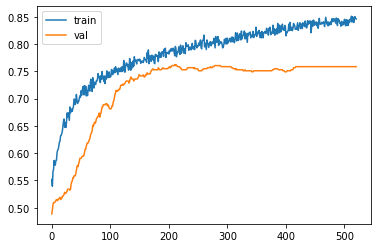

In [24]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_acc_y.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
# fit model
history = model_acc_y.fit(X_train, y_train, batch_size =10000, validation_data=(X_val, y_val), epochs=1000, verbose=0, callbacks=[es, mc])
# evaluate the model
_, train_acc = model_acc_y.evaluate(X_train, y_train, verbose=0)
_, val_acc = model_acc_y.evaluate(X_val, y_val, verbose=0)
print('Train: %.3f, Validation: %.3f' % (train_acc, val_acc))

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

In [25]:
# load the saved model
saved_model = load_model('best_acc_y.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.808, Test: 0.783


In [26]:
get_output = K.function([model_acc_y.layers[0].input],
                                  [model_acc_y.layers[3].output])
layer_output_acc_y = get_output([X_test])[0]

### ACC in x direction

In [27]:
model_acc_x.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['accuracy']) #"mean_squared_error"

In [28]:
df_acc_x

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,x
0,-0.349282,2.514354,5.516746,6.657895,14.755981,7.576555,3.267943,15.901914,3.081340,-3.868421,...,12.361244,6.086124,18.313397,13.858852,12.516746,8.255981,2.935407,17.428230,2.433014,0
1,8.026316,12.789474,6.160287,12.715311,8.784689,8.904306,9.270335,7.806220,11.409091,1.834928,...,4.399522,10.854067,14.409091,5.105263,6.100478,19.500000,12.179426,-6.294258,16.313397,0
2,21.454545,8.978469,10.933014,16.102871,7.693780,4.258373,5.583732,-4.873206,13.246411,11.444976,...,-7.167464,14.430622,9.454545,-2.253589,10.555024,21.729665,10.540670,4.605263,21.543062,0
3,2.241627,4.870813,18.971292,0.253589,2.739234,14.265550,13.354067,3.098086,14.765550,21.423445,...,3.401914,7.322967,17.172249,11.112440,11.236842,9.485646,14.059809,8.882775,0.397129,0
4,9.428230,2.468900,3.655502,8.043062,10.385167,4.889952,7.916268,17.488038,7.086124,9.399522,...,8.961722,14.452153,14.437799,5.569378,6.545455,21.811005,20.040670,12.995215,3.291866,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,-4.112440,9.583732,18.332536,-1.421053,2.988038,17.837321,1.660287,8.471292,16.425837,-5.744019,...,10.502392,9.188995,6.172249,12.169856,11.763158,5.720096,8.789474,13.834928,7.842105,1
2645,1.076555,12.114833,11.260766,1.918660,13.394737,13.358852,6.098086,14.846890,12.397129,3.516746,...,-78.334928,-8.153110,78.334928,38.880383,75.944976,-34.315789,-40.062201,52.468900,25.186603,1
2646,-38.698565,14.294258,44.564593,-14.803828,-10.284689,30.337321,0.122010,-17.342105,23.619617,18.377990,...,3.007177,8.873206,20.397129,-17.528708,2.397129,13.727273,-4.710526,5.629187,16.944976,1
2647,10.315789,15.559809,-0.055024,5.724880,2.820574,1.007177,-3.755981,9.263158,12.837321,3.729665,...,-2.502392,10.767943,1.157895,-8.681818,-0.241627,12.294258,-0.354067,-11.495215,3.595694,1


In [29]:
dataset = df_acc_x.values

In [30]:
X = dataset[:,0:400].astype(float)
Y = dataset[:,400].astype(int)

In [31]:
X, y = shuffle(X, Y, random_state=1)

In [32]:
X_train = X[:1589]
y_train = y[:1589]

In [33]:
X_val = X[1589:2119]
y_val = y[1589:2119]

In [34]:
X_test = X[2119:]
y_test = y[2119:]

In [35]:
X_train  = np.array(X_train)
y_train = np.array(y_train)
X_val  = np.array(X_val)
y_val = np.array(y_val)
X_test  = np.array(X_test)
y_test = np.array(y_test)

In [36]:
print("Train: ", X_train.shape, y_train.shape)
print("Val: ", X_val.shape, y_val.shape)
print("Test: ", X_test.shape, y_test.shape)

Train:  (1589, 400) (1589,)
Val:  (530, 400) (530,)
Test:  (530, 400) (530,)


Epoch 00546: early stopping
Train: 0.863, Validation: 0.777


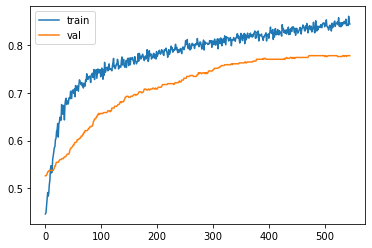

In [37]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_acc_x.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
# fit model
history = model_acc_x.fit(X_train, y_train, batch_size =10000, validation_data=(X_val, y_val), epochs=1000, verbose=0, callbacks=[es, mc])
# evaluate the model
_, train_acc = model_acc_x.evaluate(X_train, y_train, verbose=0)
_, val_acc = model_acc_x.evaluate(X_val, y_val, verbose=0)
print('Train: %.3f, Validation: %.3f' % (train_acc, val_acc))

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

In [38]:
# load the saved model
saved_model = load_model('best_acc_x.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.847, Test: 0.740


In [39]:
get_output = K.function([model_acc_x.layers[0].input],
                                  [model_acc_x.layers[3].output])
layer_output_acc_x = get_output([X_test])[0]

### ACC in z direction

In [40]:
model_acc_z.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['accuracy']) #"mean_squared_error"

In [41]:
df_acc_z

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,z
0,-0.241627,7.148325,5.229665,-2.071770,-3.057416,1.547847,-0.066986,-1.071770,0.698565,2.913876,...,1.377990,-2.564593,-1.066986,0.904306,0.272727,-1.717703,-1.545455,0.040670,0.028708,0
1,-0.260766,-1.430622,0.545455,1.284689,-1.064593,-0.291866,1.538278,-0.935407,0.440191,2.612440,...,-0.672249,-0.722488,-2.803828,-0.578947,-1.102871,-1.976077,-0.471292,-0.715311,-3.837321,0
2,-0.260766,0.318182,-1.244019,-3.007177,-0.050239,1.232057,-1.767943,0.988038,0.581340,-1.289474,...,0.650718,0.674641,-1.277512,1.590909,0.232057,-2.488038,0.114833,0.641148,-3.217703,0
3,-0.167464,-1.241627,-2.255981,-0.224880,1.315789,-1.528708,-1.423445,2.346890,-2.665072,-2.047847,...,2.992823,-0.165072,2.330144,0.138756,0.586124,1.002392,-1.784689,0.480861,-1.090909,0
4,-0.191388,0.688995,-0.102871,2.349282,0.643541,4.021531,-0.303828,-0.078947,0.145933,-2.114833,...,-3.392344,0.124402,1.533493,1.382775,-2.038278,-1.330144,1.313397,0.504785,-0.741627,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,3.476077,1.107656,1.236842,2.327751,-0.389952,0.622010,0.703349,0.696172,-2.232057,5.200957,...,0.430622,-2.882775,0.366029,0.552632,2.043062,-1.313397,0.418660,1.578947,0.000000,1
2645,-0.349282,-0.925837,0.629187,-0.488038,-0.873206,-2.251196,1.172249,0.394737,-4.088517,-1.918660,...,20.303828,22.325359,16.145933,2.248804,-2.870813,3.763158,-14.366029,-18.279904,-3.758373,1
2646,5.566986,-15.770335,-16.571770,2.366029,-1.564593,-9.521531,0.349282,12.437799,4.844498,-5.516746,...,0.968900,-2.636364,-0.782297,7.734450,5.160287,-1.787081,1.837321,2.169856,0.205742,1
2647,-0.653110,2.217703,4.949761,1.602871,3.899522,0.772727,3.547847,2.507177,4.145933,3.564593,...,5.016746,1.877990,-0.523923,4.739234,1.011962,-0.966507,2.720096,8.169856,4.057416,1


In [42]:
dataset = df_acc_z.values

In [43]:
X = dataset[:,0:400].astype(float)
Y = dataset[:,400].astype(int)

In [44]:
X, y = shuffle(X, Y, random_state=1)

In [45]:
X_train = X[:1589]
y_train = y[:1589]

In [46]:
X_val = X[1589:2119]
y_val = y[1589:2119]

In [47]:
X_test = X[2119:]
y_test = y[2119:]

In [48]:
X_train  = np.array(X_train)
y_train = np.array(y_train)
X_val  = np.array(X_val)
y_val = np.array(y_val)
X_test  = np.array(X_test)
y_test = np.array(y_test)

In [49]:
print("Train: ", X_train.shape, y_train.shape)
print("Val: ", X_val.shape, y_val.shape)
print("Test: ", X_test.shape, y_test.shape)

Train:  (1589, 400) (1589,)
Val:  (530, 400) (530,)
Test:  (530, 400) (530,)


Train: 0.961, Validation: 0.904


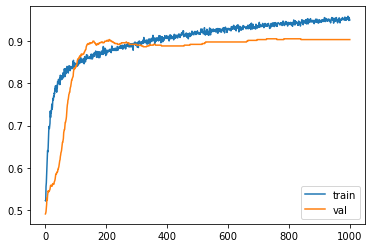

In [50]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_acc_z.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
# fit model
history = model_acc_z.fit(X_train, y_train, batch_size =10000, validation_data=(X_val, y_val), epochs=1000, verbose=0, callbacks=[es, mc])
# evaluate the model
_, train_acc = model_acc_z.evaluate(X_train, y_train, verbose=0)
_, val_acc = model_acc_z.evaluate(X_val, y_val, verbose=0)
print('Train: %.3f, Validation: %.3f' % (train_acc, val_acc))

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

In [51]:
# load the saved model
saved_model = load_model('best_acc_z.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.947, Test: 0.919


In [52]:
get_output = K.function([model_acc_z.layers[0].input],
                                  [model_acc_z.layers[3].output])
layer_output_acc_z = get_output([X_test])[0]

## Gyro in y direction ###

In [55]:
model_gyro_y.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['accuracy']) #"mean_squared_error"

In [56]:
df_gyro_y

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,y
0,-0.037234,-0.218085,-0.050000,-0.374468,-0.219149,-0.186170,-0.498936,-0.324468,-0.411702,-0.414894,...,-0.281915,0.059574,-0.009574,0.226596,-0.139362,-0.132979,0.030851,0.031915,0.178723,0
1,0.025532,-0.002128,0.080851,0.059574,0.136170,0.053191,-0.139362,0.126596,0.101064,-0.042553,...,-0.145745,0.378723,0.271277,0.024468,0.391489,0.231915,0.255319,0.495745,0.164894,0
2,0.518085,0.407447,0.454255,0.531915,0.404255,0.304255,0.576596,0.385106,0.157447,0.481915,...,-0.211702,-0.246809,-0.058511,-0.297872,0.040426,-0.029787,-0.315957,0.021277,-0.269149,0
3,-0.176596,0.113830,-0.258511,0.047872,-0.065957,-0.065957,0.013830,0.064894,-0.061702,0.105319,...,-0.055319,0.082979,0.109574,0.111702,0.112766,-0.050000,0.021277,-0.032979,0.004255,0
4,0.074468,-0.111702,-0.026596,-0.151064,-0.126596,-0.045745,-0.167021,-0.113830,-0.058511,-0.163830,...,0.026596,0.125532,0.224468,0.232979,-0.001064,0.176596,0.020213,0.253191,0.503191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,-0.915957,-0.904255,-1.196809,-0.731915,-1.060638,-0.935106,-0.945745,-0.807447,-0.998936,-0.719149,...,0.385106,0.437234,0.450000,0.341489,0.503191,0.313830,0.305319,0.488298,0.381915,1
2645,0.269149,0.514894,0.205319,0.750000,-0.074468,0.706383,-0.041489,0.344681,0.489362,-0.056383,...,-1.775532,-0.406383,-0.451064,-1.157447,0.221277,-0.987234,-0.158511,-0.621277,-0.942553,1
2646,-0.030851,-0.751064,-0.359574,-0.692553,-1.026596,-0.188298,-0.790426,-0.274468,-0.381915,-0.341489,...,0.265957,0.519149,0.041489,0.293617,0.168085,0.129787,-0.147872,-0.019149,-0.248936,1
2647,-0.159574,-0.357447,-0.560638,-0.570213,-0.289362,-0.634043,-0.950000,-0.473404,-0.373404,-0.959574,...,-0.086170,0.132979,-0.168085,-0.132979,-0.871277,-0.827660,-0.592553,-1.185106,-0.576596,1


In [57]:
dataset = df_gyro_y.values

In [58]:
X = dataset[:,0:200].astype(float)
Y = dataset[:,200].astype(int)

In [59]:
X, y = shuffle(X, Y, random_state=1)

In [60]:
X_train = X[:1589]
y_train = y[:1589]

In [61]:
X_val = X[1589:2119]
y_val = y[1589:2119]

In [62]:
X_test = X[2119:]
y_test = y[2119:]

In [63]:
X_train  = np.array(X_train)
y_train = np.array(y_train)
X_val  = np.array(X_val)
y_val = np.array(y_val)
X_test  = np.array(X_test)
y_test = np.array(y_test)

In [64]:
print("Train: ", X_train.shape, y_train.shape)
print("Val: ", X_val.shape, y_val.shape)
print("Test: ", X_test.shape, y_test.shape)

Train:  (1589, 200) (1589,)
Val:  (530, 200) (530,)
Test:  (530, 200) (530,)


Train: 0.947, Validation: 0.942


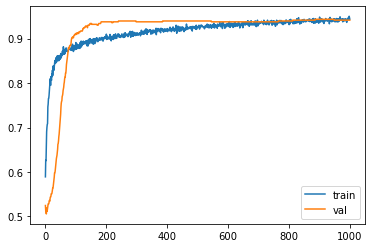

In [65]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_gyro_y.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
# fit model
history = model_gyro_y.fit(X_train, y_train, batch_size =10000, validation_data=(X_val, y_val), epochs=1000, verbose=0, callbacks=[es, mc])
# evaluate the model
_, train_acc = model_gyro_y.evaluate(X_train, y_train, verbose=0)
_, val_acc = model_gyro_y.evaluate(X_val, y_val, verbose=0)
print('Train: %.3f, Validation: %.3f' % (train_acc, val_acc))

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

In [66]:
# load the saved model
saved_model = load_model('best_gyro_y.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.946, Test: 0.942


In [67]:
get_output = K.function([model_gyro_y.layers[0].input],
                                  [model_gyro_y.layers[3].output])
layer_output_gyro_y = get_output([X_test])[0]

## Gyro in x direction ###

In [68]:
model_gyro_x.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['accuracy']) #"mean_squared_error"

In [69]:
df_gyro_x

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,x
0,1.382979,-0.215957,0.838298,0.610638,0.442553,0.061702,0.343617,-0.515957,-0.229787,-0.528723,...,-0.281915,-0.118085,-0.295745,-0.114894,-0.486170,-0.331915,-0.388298,-0.198936,-0.135106,0
1,-0.036170,-0.095745,-0.026596,-0.037234,0.134043,-0.056383,0.380851,0.017021,0.289362,-0.265957,...,-1.187234,-0.770213,-0.677660,-0.697872,-0.736170,-0.747872,-0.504255,-0.564894,-0.324468,0
2,-0.310638,-0.023404,0.088298,0.267021,0.031915,0.353191,0.035106,0.560638,0.443617,0.482979,...,-0.202128,-0.052128,-0.009574,-0.300000,-0.068085,-0.440426,-0.297872,-0.108511,-0.378723,0
3,-0.309574,-0.425532,-0.434043,-0.514894,-0.471277,-0.225532,-0.581915,-0.162766,-0.598936,0.027660,...,0.092553,0.265957,0.205319,0.367021,0.074468,0.367021,0.419149,0.295745,0.227660,0
4,0.222340,0.290426,0.000000,0.063830,0.076596,-0.036170,-0.028723,-0.451064,0.155319,-0.221277,...,0.086170,-0.351064,0.320213,-0.004255,0.087234,0.252128,0.300000,0.935106,0.835106,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,-0.204255,-0.642553,-1.843617,-0.948936,-1.315957,-1.796809,-0.985106,-1.006383,-1.804255,-0.147872,...,-0.767021,-0.644681,-0.405319,-0.307447,-0.412766,-0.196809,-0.343617,0.079787,-0.250000,1
2645,-0.250000,-0.014894,-0.143617,-0.286170,-0.382979,0.258511,0.110638,-0.353191,0.254255,-0.276596,...,3.059574,0.059574,1.594681,-0.295745,1.791489,-0.251064,-0.227660,0.025532,1.377660,1
2646,-0.481915,0.185106,-1.208511,2.037234,1.248936,-1.311702,1.852128,0.170213,0.856383,0.892553,...,0.467021,0.777660,0.878723,1.311702,1.075532,0.970213,1.051064,0.777660,1.210638,1
2647,0.317021,0.675532,-0.405319,0.254255,0.012766,-1.423404,-1.987234,-1.596809,-1.720213,-2.514894,...,0.986170,0.942553,0.465957,0.688298,1.685106,-1.208511,-0.755319,-1.470213,1.778723,1


In [70]:
dataset = df_gyro_x.values

In [71]:
X = dataset[:,0:200].astype(float)
Y = dataset[:,200].astype(int)

In [72]:
X, y = shuffle(X, Y, random_state=1)

In [73]:
X_train = X[:1589]
y_train = y[:1589]

In [74]:
X_val = X[1589:2119]
y_val = y[1589:2119]

In [75]:
X_test = X[2119:]
y_test = y[2119:]

In [76]:
X_train  = np.array(X_train)
y_train = np.array(y_train)
X_val  = np.array(X_val)
y_val = np.array(y_val)
X_test  = np.array(X_test)
y_test = np.array(y_test)

In [77]:
print("Train: ", X_train.shape, y_train.shape)
print("Val: ", X_val.shape, y_val.shape)
print("Test: ", X_test.shape, y_test.shape)

Train:  (1589, 200) (1589,)
Val:  (530, 200) (530,)
Test:  (530, 200) (530,)


Train: 0.963, Validation: 0.953


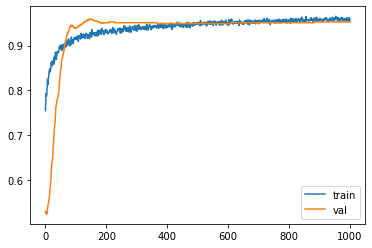

In [78]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_gyro_x.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
# fit model
history = model_gyro_x.fit(X_train, y_train, batch_size =10000, validation_data=(X_val, y_val), epochs=1000, verbose=0, callbacks=[es, mc])
# evaluate the model
_, train_acc = model_gyro_x.evaluate(X_train, y_train, verbose=0)
_, val_acc = model_gyro_x.evaluate(X_val, y_val, verbose=0)
print('Train: %.3f, Validation: %.3f' % (train_acc, val_acc))

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

In [79]:
# load the saved model
saved_model = load_model('best_gyro_x.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.948, Test: 0.968


In [80]:
get_output = K.function([model_gyro_x.layers[0].input],
                                  [model_gyro_x.layers[3].output])
layer_output_gyro_x = get_output([X_test])[0]

## Gyro in z direction ###

In [81]:
model_gyro_z.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['accuracy']) #"mean_squared_error"

In [82]:
df_gyro_z

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,z
0,0.078723,0.203191,0.060638,-0.042553,0.001064,-0.030851,-0.072340,0.060638,-0.037234,-0.036170,...,-0.188298,-0.063830,-0.059574,0.088298,0.056383,-0.023404,0.008511,-0.015957,0.025532,0
1,-0.052128,0.018085,0.093617,0.095745,0.061702,0.081915,-0.070213,-0.031915,0.104255,0.023404,...,-0.047872,0.038298,-0.023404,0.008511,0.043617,0.052128,0.101064,0.267021,0.100000,0
2,0.203191,0.043617,0.178723,0.131915,0.145745,0.145745,0.192553,-0.017021,-0.078723,0.068085,...,0.081915,0.038298,0.100000,0.029787,0.139362,0.084043,0.025532,-0.042553,-0.058511,0
3,-0.032979,0.061702,0.010638,0.087234,0.045745,0.034043,0.109574,0.000000,0.022340,-0.063830,...,-0.081915,-0.036170,0.060638,0.038298,0.019149,-0.129787,-0.120213,-0.038298,0.085106,0
4,0.056383,-0.014894,0.004255,0.014894,-0.038298,0.021277,-0.001064,0.036170,-0.087234,-0.039362,...,-0.119149,-0.025532,-0.026596,0.031915,-0.063830,-0.008511,0.022340,0.022340,0.109574,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,0.195745,0.277660,0.446809,0.415957,0.494681,0.552128,0.318085,0.404255,0.257447,0.113830,...,0.513830,0.332979,0.315957,0.208511,0.272340,0.175532,0.178723,0.176596,0.201064,1
2645,0.286170,0.252128,0.324468,0.380851,0.315957,0.248936,0.329787,0.267021,0.396809,0.262766,...,0.028723,0.575532,0.880851,0.882979,0.921277,0.813830,0.906383,0.194681,-0.111702,1
2646,0.144681,0.250000,0.006383,-0.956383,-0.720213,-0.101064,-0.457447,-0.198936,-0.062766,0.090426,...,0.100000,0.089362,-0.076596,-0.002128,0.075532,0.015957,0.038298,0.008511,-0.121277,1
2647,0.064894,-0.070213,0.092553,-0.213830,-0.076596,0.279787,0.163830,-0.026596,-0.036170,-0.137234,...,-0.226596,-0.219149,-0.247872,-0.490426,-0.443617,-0.150000,0.196809,-0.210638,-0.103191,1


In [83]:
dataset = df_gyro_z.values

In [84]:
X = dataset[:,0:200].astype(float)
Y = dataset[:,200].astype(int)

In [85]:
X, y = shuffle(X, Y, random_state=1)

In [86]:
X_train = X[:1589]
y_train = y[:1589]

In [87]:
X_val = X[1589:2119]
y_val = y[1589:2119]

In [88]:
X_test = X[2119:]
y_test = y[2119:]

In [89]:
X_train  = np.array(X_train)
y_train = np.array(y_train)
X_val  = np.array(X_val)
y_val = np.array(y_val)
X_test  = np.array(X_test)
y_test = np.array(y_test)

In [90]:
print("Train: ", X_train.shape, y_train.shape)
print("Val: ", X_val.shape, y_val.shape)
print("Test: ", X_test.shape, y_test.shape)

Train:  (1589, 200) (1589,)
Val:  (530, 200) (530,)
Test:  (530, 200) (530,)


Train: 0.957, Validation: 0.932


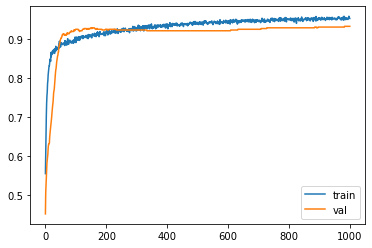

In [91]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_gyro_z.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
# fit model
history = model_gyro_z.fit(X_train, y_train, batch_size =10000, validation_data=(X_val, y_val), epochs=1000, verbose=0, callbacks=[es, mc])
# evaluate the model
_, train_acc = model_gyro_z.evaluate(X_train, y_train, verbose=0)
_, val_acc = model_gyro_z.evaluate(X_val, y_val, verbose=0)
print('Train: %.3f, Validation: %.3f' % (train_acc, val_acc))

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

In [92]:
# load the saved model
saved_model = load_model('best_gyro_z.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.957, Test: 0.945


In [93]:
get_output = K.function([model_gyro_z.layers[0].input],
                                  [model_gyro_z.layers[3].output])
layer_output_gyro_z = get_output([X_test])[0]

## Multivoting on output ##

In [109]:
kay = 0
kax = 0
kaz = 0.5

In [110]:
kgy = 0.1
kgx = 0.7
kgz = 0.15

In [111]:
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

for i in range(len(y_test)):
    temp = (kay*layer_output_acc_y[i][0]+kax*layer_output_acc_x[i][0]+kaz*layer_output_acc_z[i][0] + 
    kgy*layer_output_gyro_y[i][0]+kgx*layer_output_gyro_x[i][0]+kgz*layer_output_gyro_z[i][0])
    
    if temp <= 0.5: 
        temp = 0
    else:
        temp = 1
        
    if temp == 0 and y_test[i] == 0:
        true_negative += 1
    elif temp == 0 and y_test[i] == 1:
        false_positive += 1
    elif temp == 1 and y_test[i] == 1:
        true_positive += 1
    elif temp == 1 and y_test[i] == 0:
        false_negative += 1

In [112]:
accuracy = (true_negative+true_positive)/(true_negative+true_positive+false_negative+false_positive)

In [113]:
print(accuracy)

0.969811320754717


In [114]:
precision = true_positive/(true_positive+false_positive)
print(precision)

0.9581589958158996


In [115]:
recall = true_positive/(true_positive+false_negative)
print(recall)

0.9744680851063829


In [116]:
f_1 = 2*((precision*recall)/(precision+recall))
print(f_1)

0.9662447257383966
